<a href="https://colab.research.google.com/github/SaiRam2429/Bird-species-classification/blob/main/Bird_data_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('gdrive')

Mounted at gdrive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import skimage.io
import os 
import glob
import tqdm
import tensorflow as tf
from tqdm import tqdm
from skimage.io import imread, imshow
from skimage.transform import resize
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
os.chdir('/content/gdrive/MyDrive/Colab Notebooks/bird classification')

In [4]:
generator = ImageDataGenerator()
batches = generator.flow_from_directory('train')   # batches variable contain a tuple for different batches along with labels

Found 35215 images belonging to 250 classes.


In [5]:
indices = batches.class_indices
indices

{'AFRICAN CROWNED CRANE': 0,
 'AFRICAN FIREFINCH': 1,
 'ALBATROSS': 2,
 'ALEXANDRINE PARAKEET': 3,
 'AMERICAN AVOCET': 4,
 'AMERICAN BITTERN': 5,
 'AMERICAN COOT': 6,
 'AMERICAN GOLDFINCH': 7,
 'AMERICAN KESTREL': 8,
 'AMERICAN PIPIT': 9,
 'AMERICAN REDSTART': 10,
 'ANHINGA': 11,
 'ANNAS HUMMINGBIRD': 12,
 'ANTBIRD': 13,
 'ARARIPE MANAKIN': 14,
 'ASIAN CRESTED IBIS': 15,
 'BALD EAGLE': 16,
 'BALI STARLING': 17,
 'BALTIMORE ORIOLE': 18,
 'BANANAQUIT': 19,
 'BANDED BROADBILL': 20,
 'BAR-TAILED GODWIT': 21,
 'BARN OWL': 22,
 'BARN SWALLOW': 23,
 'BARRED PUFFBIRD': 24,
 'BAY-BREASTED WARBLER': 25,
 'BEARDED BARBET': 26,
 'BELTED KINGFISHER': 27,
 'BIRD OF PARADISE': 28,
 'BLACK FRANCOLIN': 29,
 'BLACK SKIMMER': 30,
 'BLACK SWAN': 31,
 'BLACK THROATED WARBLER': 32,
 'BLACK VULTURE': 33,
 'BLACK-CAPPED CHICKADEE': 34,
 'BLACK-NECKED GREBE': 35,
 'BLACK-THROATED SPARROW': 36,
 'BLACKBURNIAM WARBLER': 37,
 'BLUE GROUSE': 38,
 'BLUE HERON': 39,
 'BOBOLINK': 40,
 'BROWN NOODY': 41,
 'BROWN THRAS

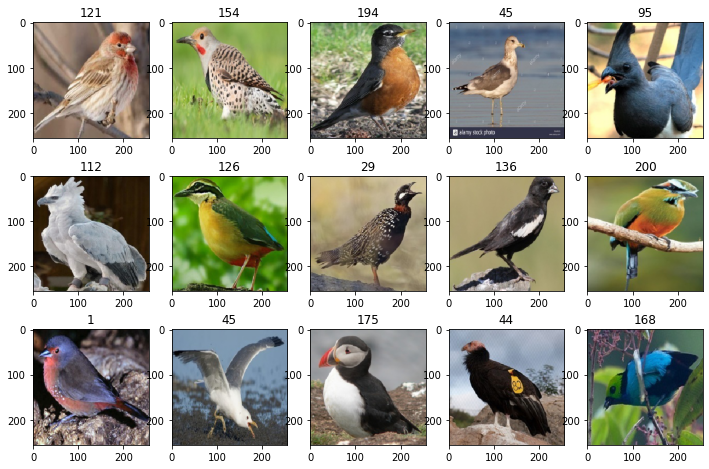

In [6]:
fig, ax = plt.subplots(3,5, figsize=(12, 8))
axlist = ax.flatten()
for i in range(15):
    axlist[i].imshow(batches[0][0][i].astype(int))
    axlist[i].title.set_text(np.argmax(batches[0][1][i]))

In [7]:
train_data = ImageDataGenerator(rescale = 1/255,
                                   horizontal_flip=True,
                                   vertical_flip=True,
                                   zoom_range=0.2,
                                   shear_range=0.2,
                                   rotation_range=30,
                                   fill_mode='nearest')

valid_data = ImageDataGenerator(rescale = 1/255)

test_data  = ImageDataGenerator(rescale = 1/255)

In [8]:
train_directory ='train'
test_directory = 'test'
valid_directory = 'valid'

In [9]:
train_generator = train_data.flow_from_directory(train_directory,
                                                  target_size=(224,224),
                                                  color_mode='rgb',
                                                  class_mode='sparse',
                                                  batch_size=256)

val_generator = valid_data.flow_from_directory(valid_directory,
                                               target_size=(224,224),
                                               color_mode='rgb',
                                               class_mode='sparse',
                                               batch_size=256)

test_generator = test_data.flow_from_directory(test_directory,
                                                target_size=(224,224),
                                                color_mode='rgb',
                                                class_mode='sparse',
                                                batch_size=256)

Found 35215 images belonging to 250 classes.
Found 1250 images belonging to 250 classes.
Found 1250 images belonging to 250 classes.


In [10]:
from tensorflow.keras.applications import ResNet101V2, InceptionV3
from tensorflow.keras.layers import Conv2D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping

In [11]:
model = ResNet101V2(include_top=True, weights='imagenet')

179519488/179518384 [==============================] - 1s 0us/step


In [12]:
model.summary()

Model: "resnet101v2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
________________________________________________________________________________________

In [13]:
resnet_model = ResNet101V2(input_shape=(224,224,3),
                        weights='imagenet',
                        include_top=False)

171319296/171317808 [==============================] - 2s 0us/step


In [14]:
for layer in resnet_model.layers:   # These layers dont learn anything as they are using weights from other model
    layer.trainable=False

In [16]:
# model=tf.keras.models.Sequential()
# model.add(resnet_model)
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Dense(2048,kernel_initializer=tf.keras.initializers.glorot_uniform(seed=0)))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Activation('relu'))
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Dense(1024,kernel_initializer='he_uniform'))
# model.add(tf.keras.layers.BatchNormalization())
# model.add(tf.keras.layers.Activation('relu'))
# model.add(tf.keras.layers.Dropout(0.5))
# model.add(tf.keras.layers.Dense(225,activation='softmax'))
tf.keras.backend.clear_session()
incbasemodel4 = InceptionV3(weights = 'imagenet' , include_top = False, input_shape = (224 , 224 , 3))
incbasemodel4.trainable = False


In [ ]:
modelinceptionv3_vers4 = tf.keras.models.Sequential()
modelinceptionv3_vers4.add(incbasemodel4)
modelinceptionv3_vers4.add(Conv2D(1024 , (3,3) , padding = 'same', activation = 'relu'))
modelinceptionv3_vers4.add(BatchNormalization())
modelinceptionv3_vers4.add(Dropout(0.5))
modelinceptionv3_vers4.add(Flatten())
modelinceptionv3_vers4.add(Dense(512 , activation = 'relu'))
modelinceptionv3_vers4.add(Dropout(0.5))
modelinceptionv3_vers4.add(Dense(250, activation = 'softmax'))
modelinceptionv3_vers4.compile(optimizer = tf.keras.optimizers.Adam(lr=0.001),
               loss = 'sparse_categorical_crossentropy',
               metrics = ['accuracy'])
history = modelinceptionv3_vers4.fit(
          train_generator,
          epochs=50,
          validation_data=val_generator,
          validation_steps=29,
          verbose=1, 
          )

Epoch 1/50
138/138 [==============================] - 12191s 88s/step - loss: 5.5674 - accuracy: 0.0262 - val_loss: 4.0586 - val_accuracy: 0.1824
Epoch 2/50
138/138 [==============================] - 426s 3s/step - loss: 4.5335 - accuracy: 0.0927
Epoch 3/50
138/138 [==============================] - 424s 3s/step - loss: 3.9401 - accuracy: 0.1427
Epoch 4/50
138/138 [==============================] - 423s 3s/step - loss: 3.5305 - accuracy: 0.1950
Epoch 5/50
138/138 [==============================] - 423s 3s/step - loss: 3.2574 - accuracy: 0.2324
Epoch 6/50
138/138 [==============================] - 422s 3s/step - loss: 3.0467 - accuracy: 0.2668
Epoch 7/50
138/138 [==============================] - 419s 3s/step - loss: 2.8900 - accuracy: 0.2973
Epoch 8/50
138/138 [==============================] - 415s 3s/step - loss: 2.7359 - accuracy: 0.3294
Epoch 9/50
138/138 [==============================] - 414s 3s/step - loss: 2.5697 - accuracy: 0.3670
Epoch 10/50
138/138 [=========================